In [26]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets

from sklearn.svm import SVC

In [3]:
faces = datasets.fetch_lfw_people(min_faces_per_person=70,resize=1)
faces

{'data': array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
          86.333336],
        [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
         185.33333 ],
        [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
         182.33333 ],
        ...,
        [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
          30.333334],
        [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
         127.333336],
        [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
          99.      ]], dtype=float32),
 'images': array([[[253.66667 , 253.66667 , 254.66667 , ...,  42.333332,
           37.666668,  39.      ],
         [254.      , 254.      , 253.66667 , ...,  43.333332,
           38.      ,  39.      ],
         [254.66667 , 254.33333 , 253.33333 , ...,  44.      ,
           38.666668,  38.      ],
         ...,
         [ 68.333336,  63.333332,  51.      , ...,  90.333336,
     

In [4]:
X = faces['data']

y = faces['target']

names = faces.target_names

In [5]:
image = faces['images']

image.shape

(1288, 125, 94)

'George W Bush'

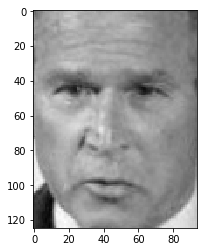

In [6]:
index = np.random.randint(1288,size = 1)[0]

plt.imshow(image[index],cmap = plt.cm.gray)

names[y[index]]

In [7]:
X.shape

(1288, 11750)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

svc = SVC(kernel='rbf')

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.7713178294573644
Wall time: 21 s


In [10]:
#维度降低     PCA用来jiangwei
from sklearn.decomposition import PCA

In [11]:
#Principal component analysis (PCA)
pca = PCA(n_components=0.9,whiten=True)

#代表原来的数据，经过矩阵运算，结果属性看不懂，脱敏数据
X_pca = pca.fit_transform(X)

X_pca.shape

(1288, 116)

In [12]:
X_pca

array([[ 0.13126512,  0.14904137,  0.5178854 , ..., -1.031124  ,
         0.7270022 , -0.45552015],
       [ 0.9203943 , -0.80004954,  0.6680734 , ..., -1.3528848 ,
        -0.23117338, -0.6134937 ],
       [-0.6990414 , -0.30689296, -0.8637635 , ..., -0.3253204 ,
         0.8120446 , -0.8251613 ],
       ...,
       [ 1.7497383 ,  0.39074886, -0.25402576, ..., -0.41649672,
         0.4104162 , -0.55117846],
       [-1.7680949 , -0.65494925,  0.7710118 , ...,  1.3911158 ,
         1.0503511 , -0.44918883],
       [ 0.5447326 , -0.15662496,  0.66641086, ...,  1.5721664 ,
        -0.02239902, -1.5431018 ]], dtype=float32)

In [13]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size = 0.2)

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.7829457364341085
Wall time: 333 ms


In [14]:
y

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [15]:
import imblearn

In [16]:
# 过采样
from imblearn.over_sampling import SMOTE

In [19]:
'''This object is an implementation of SMOTE - Synthetic Minority
Over-sampling Technique as presented in'''
smote = SMOTE()

In [20]:
X2,y2 = smote.fit_resample(X,y)

In [21]:
for i in range(7):
    print(names[i],(y2 == i).sum())

Ariel Sharon 530
Colin Powell 530
Donald Rumsfeld 530
George W Bush 530
Gerhard Schroeder 530
Hugo Chavez 530
Tony Blair 530


In [22]:
pca = PCA(n_components=0.9,whiten=True)

X2_pca = pca.fit_transform(X2)
X2_pca.shape

(3710, 99)

In [23]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X2_pca,y2,test_size = 0.2)

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.9743935309973046
Wall time: 881 ms


In [24]:
%%time
face_train,face_test,X_train,X_test,y_train,y_test = train_test_split(X2,X2_pca,y2,test_size = 0.2)

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

y_ = svc.predict(X_test)

0.9892183288409704
Wall time: 1.14 s


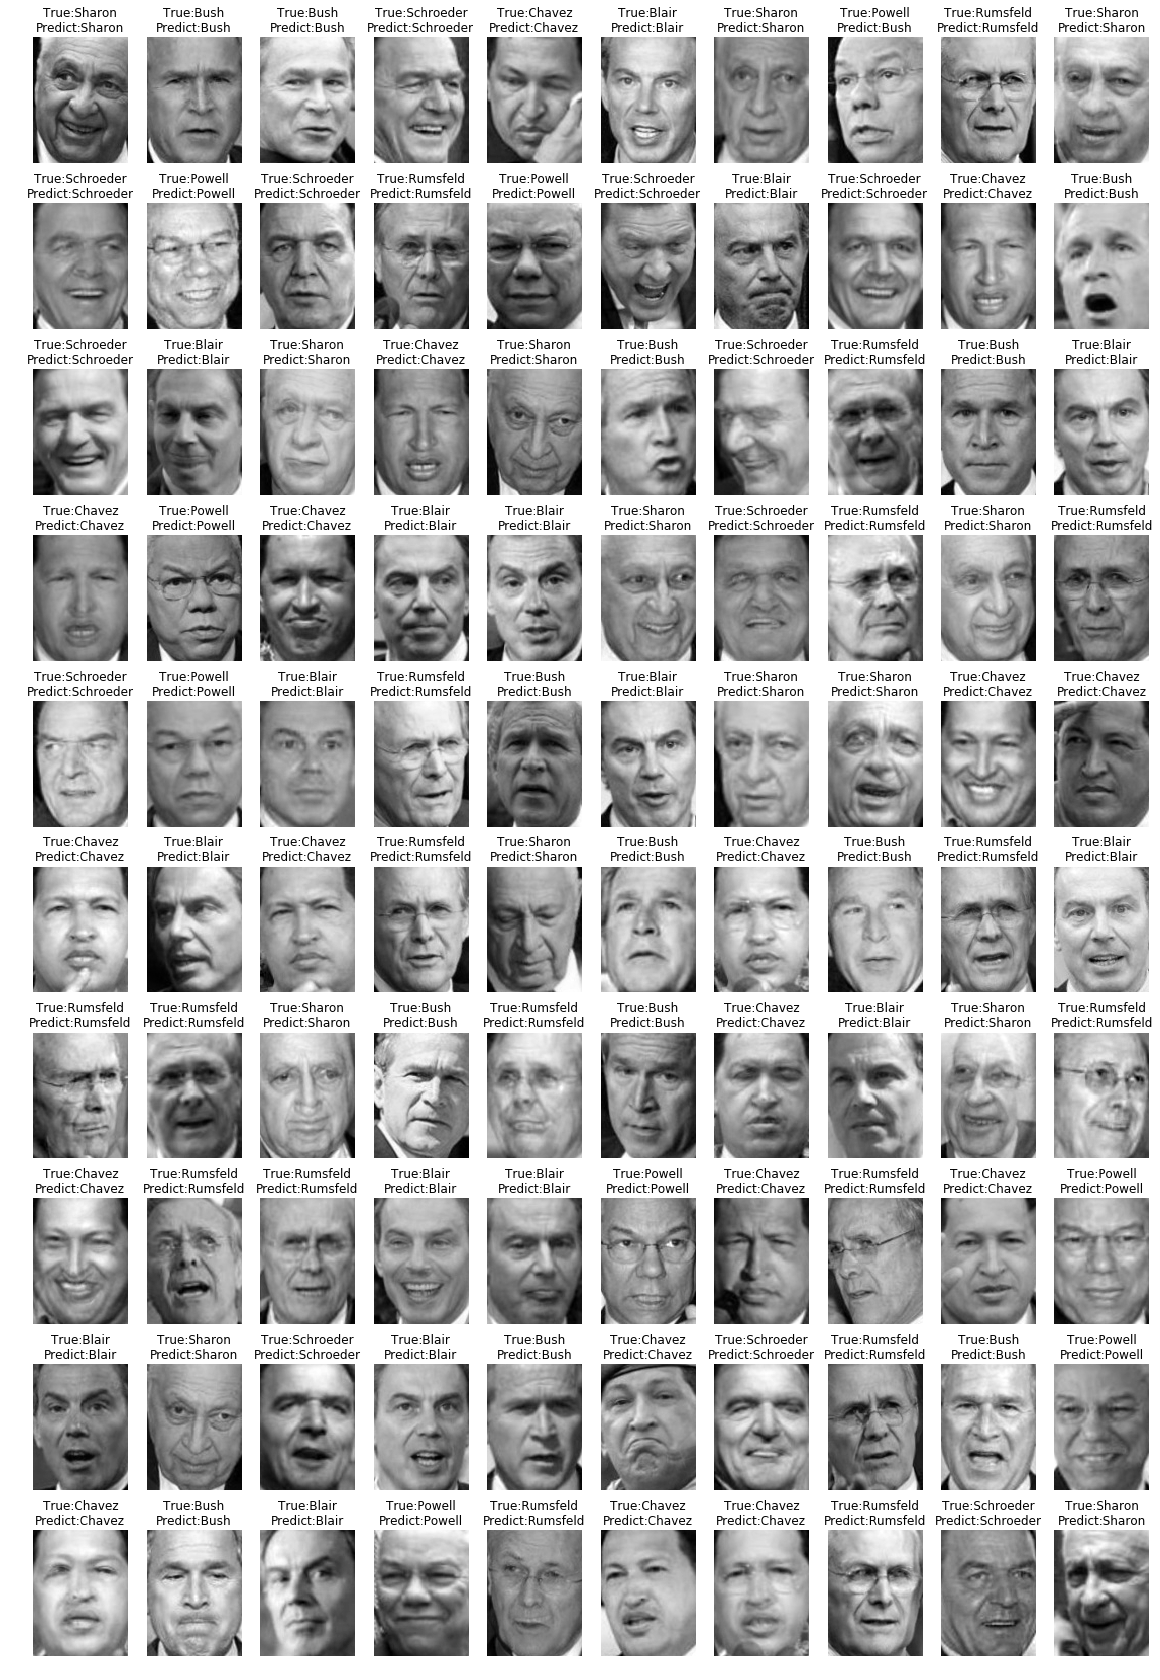

In [25]:
plt.figure(figsize=(10*2,10*3))
for i in range(100):
    
    ax = plt.subplot(10,10,i + 1)
    
    face = face_test[i].reshape(125,94)
    
    ax.imshow(face,cmap = 'gray')
    ax.axis('off')
    t = names[y_test[i]].split(' ')[-1]
    
    p = names[y_[i]].split(' ')[-1]
    
    ax.set_title('True:%s\nPredict:%s'%(t,p))